### Analyse du taux de désabonnement des clients de télécommunication
Objectif : 
- Identifier les facteurs influençant le taux de désabonnement des clients.
- Construire un modèle prédictif pour anticiper les désabonnements.         


#### Importation et description des données 

In [370]:
## Importation des bibliothèques 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report

In [371]:
## Importation et Description des données 

data =pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Importation effectué avec succès")

Importation effectué avec succès


In [372]:
## Description des données 
print("Voici l'Aperçu des données :")
print("="*150)
display(data.head())
print("="*150)
print("voici les informations sur les données :")
print("="*150)
display(data.info())
print("="*150)
print("Voici les statistiques descriptives des données numériques :")
print("="*150)
display(data.describe())
print("="*150)
print("Voici la dimension des données :")
print("="*150)
display(data.shape)

Voici l'Aperçu des données :


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


voici les informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

None

Voici les statistiques descriptives des données numériques :


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Voici la dimension des données :


(7043, 21)

En se basant sur la description des données on remarque que le type de "TotalCharges"  devrait etre en float mais est en object . cela necessitera leur conversion dans leur types approprié . 

#### Visualisation et  Traitement des Données 

In [373]:
## converion des types de données

'''
Suite a notre remarque nous allons proceder a la conversion des types de données " TotalCharges "
'''
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors="coerce")
print("Conversion des types effectuée avec succès")

Conversion des types effectuée avec succès


In [374]:
print("type de SeniorCitizen :",data["SeniorCitizen"].dtype)
print("type de TotalCharges :",data["TotalCharges"].dtype)
print("="*150)
display(data.describe())
display(data.info())

type de SeniorCitizen : int64
type de TotalCharges : float64


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

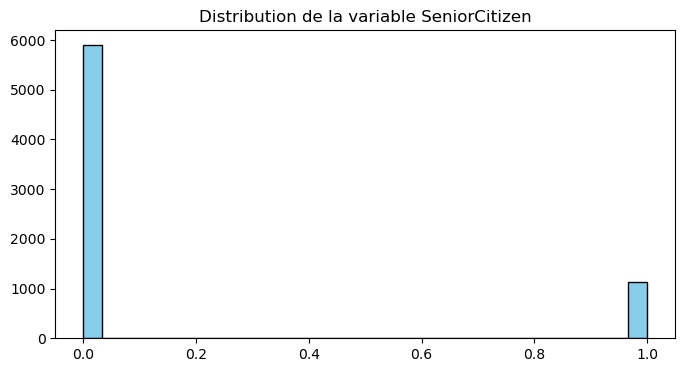

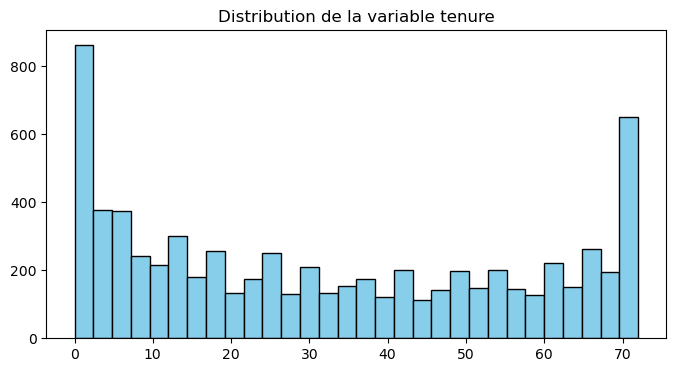

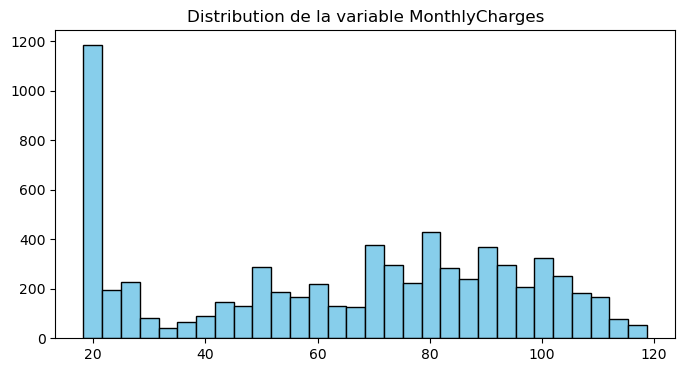

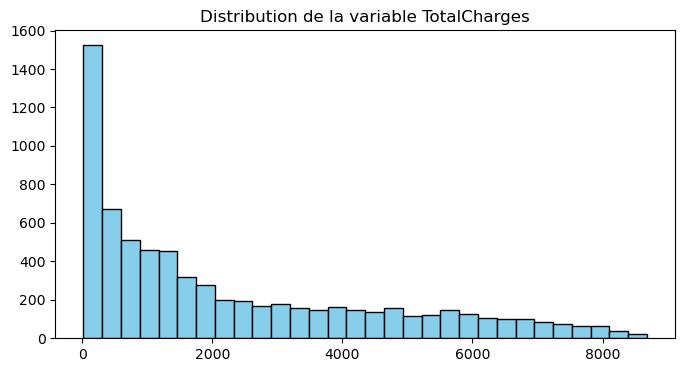

In [375]:
for i in data.select_dtypes(include=["float64","int64"]).columns:
    plt.figure(figsize=(8,4))
    plt.hist(data[i],bins=30,color="skyblue",edgecolor="black")
    plt.title(f"Distribution de la variable {i}")
    plt.show()

#### Analyse bivarié  de quelque variables cibles 

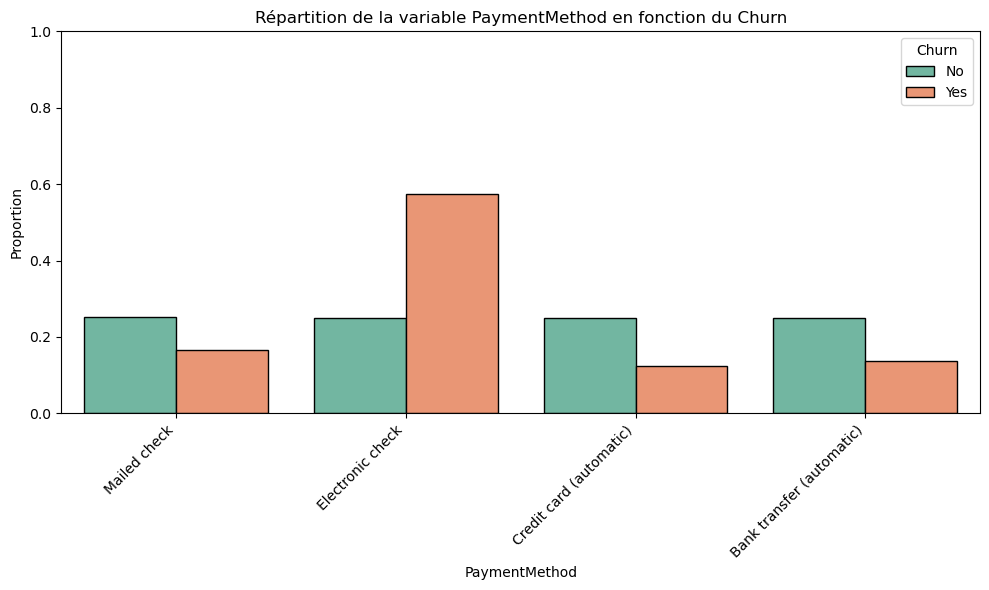

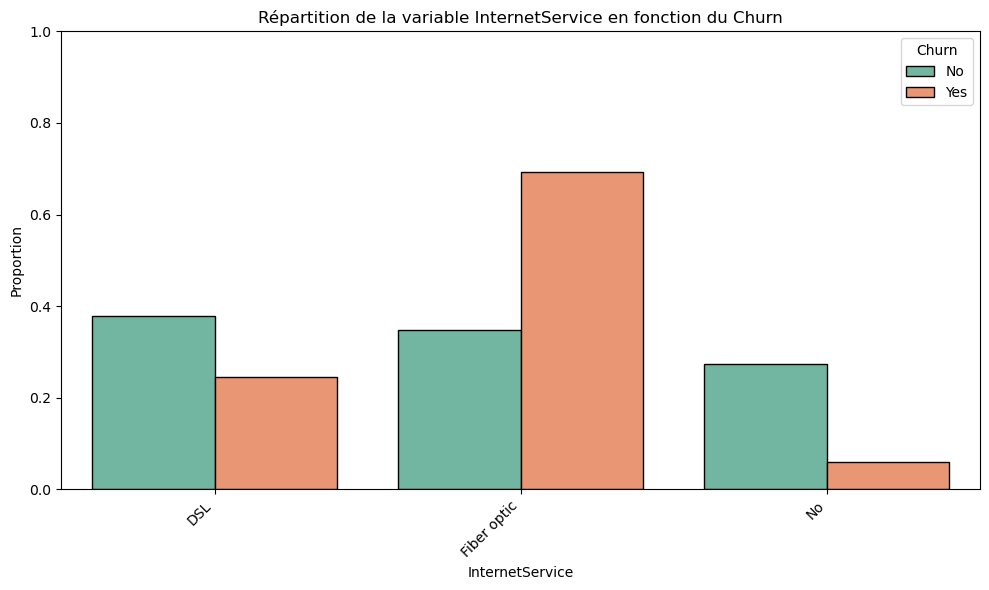

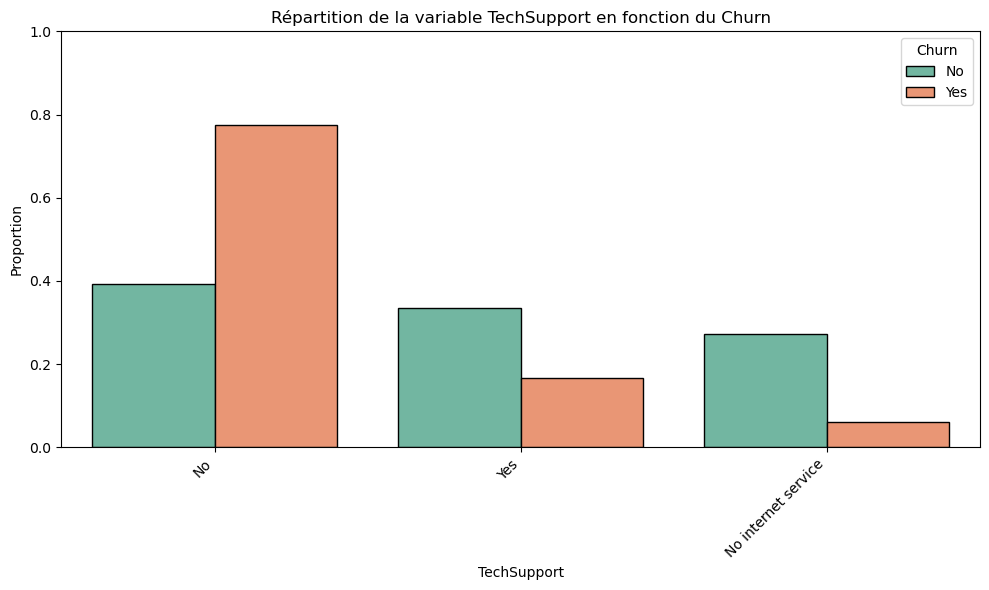

In [376]:
data_cat=["PaymentMethod","InternetService","TechSupport"]
for i in data_cat:
    group = data.groupby(by="Churn")[i].value_counts(normalize=True).rename("count") 
    donnee = group.reset_index()  
    
    plt.figure(figsize=(10,6))
    sns.barplot(data=donnee, x=i, y="count", hue="Churn", palette="Set2", edgecolor="black")
    plt.title(f"Répartition de la variable {i} en fonction du Churn")
    plt.ylabel("Proportion")  
    plt.ylim(0, 1)            
    plt.xticks(rotation=45, ha='right') 
    plt.legend(title="Churn") 
    plt.tight_layout()        
    plt.show()

In [377]:
a=data.groupby(by="Churn")["InternetService"].value_counts(normalize=True)
b=data.groupby(by="Churn")["PaymentMethod"].value_counts(normalize=True)
c=data.groupby(by="Churn")["TechSupport"].value_counts(normalize=True)
display(a)
display(b)  
display(c)

Churn  InternetService
No     DSL                0.379204
       Fiber optic        0.347700
       No                 0.273096
Yes    Fiber optic        0.693954
       DSL                0.245586
       No                 0.060460
Name: proportion, dtype: float64

Churn  PaymentMethod            
No     Mailed check                 0.252029
       Electronic check             0.250097
       Credit card (automatic)      0.249324
       Bank transfer (automatic)    0.248550
Yes    Electronic check             0.573034
       Mailed check                 0.164794
       Bank transfer (automatic)    0.138042
       Credit card (automatic)      0.124131
Name: proportion, dtype: float64

Churn  TechSupport        
No     No                     0.391767
       Yes                    0.335137
       No internet service    0.273096
Yes    No                     0.773676
       Yes                    0.165864
       No internet service    0.060460
Name: proportion, dtype: float64

- On constate que les clients qui payent leur abonnement par voie electronique sont les plus enclins a se desabonner(57% des desabonnement concernait les clients qui payent par voie electronique ) . Aussi ceux qui ont la fibre optique et ceux qui n'ont pas de support de technique sont ceux qui ont le plus grand pourcentage de desabonnement . 

In [378]:
## Visualisation des valeurs manquantes 
tableau={}
for i in data.columns:
    f=data[i].isnull().sum()
    if f>0:
        propo=(f/len(data))*100
        tableau[i] = propo
## dataframe des valeurs manquantes
pro1=pd.DataFrame.from_dict(tableau,orient="index",columns=["Proportion des valeurs manquantes"])

display(pro1)

,Proportion des valeurs manquantes
TotalCharges,0.156183


On sait que ,d'apres la description du jeu de donnée que le "totalcharge "est le montant total facturé tout au long de la tenure du client (nombre de mois pendant lequel le client est restez avec l'entreprise ),du coup l'absence de montant toal(presence de valeur manquantes) peut etre liée au fait que le client n'est pas restez au moins un mois avec l'entreprise avec qui il a souscrit . verifions cela .

In [379]:
data[data["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Bingo. on constate que les clients avec des valeurs manquantes pour "TotalCharges" ont une tenure de 0 mois,
ce qui confirme notre hypothèse initiale. Donc dans cet cas nous allons remplacer toutes les valeurs manquantes par 0 et non les supprimer . 

In [380]:
## remplacement des valeurs manquantes
data["TotalCharges"]=data["TotalCharges"].fillna(0)
print("remplacement des valeurs manquantes effectué avec succès")
display(data["TotalCharges"].isnull().sum())

remplacement des valeurs manquantes effectué avec succès


np.int64(0)

Maintenant passons a la visualisation des valeurs aberrantes pour nos variables quantitatives . 

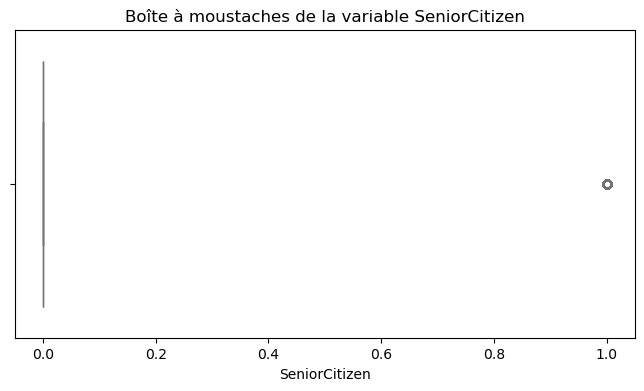

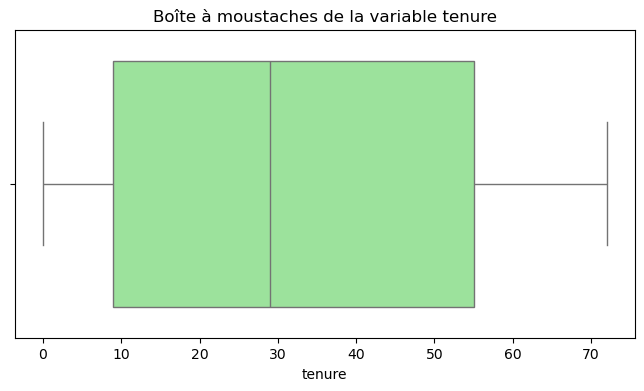

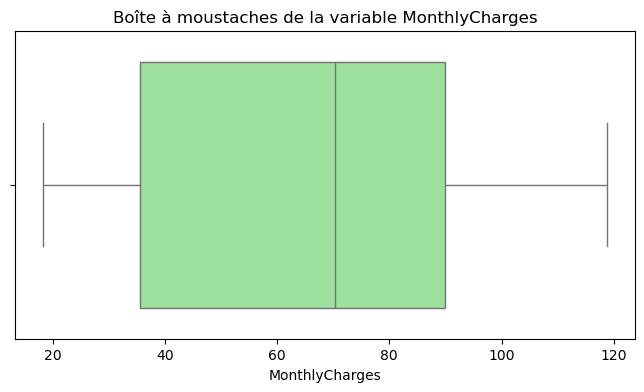

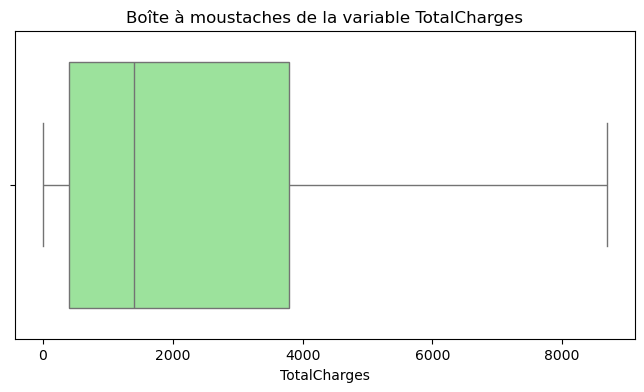

In [381]:
## visualisation des valeurs aberrantes pour les variables quantitatives
for i in data.select_dtypes(include=["float64","int64"]).columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[i],color="lightgreen")
    plt.title(f"Boîte à moustaches de la variable {i}")
    plt.show()

Super . on constate que nos donnée numerique n'ont pas de valeurs aberrantes , nous pouvons passer a la prochaine etapes qui sera l'analyse en composante multiple pour reduire la dimensionalité (nous avons 18 variables categorielles  sur 21 variables.) 

##### Analyse en composante multiple 

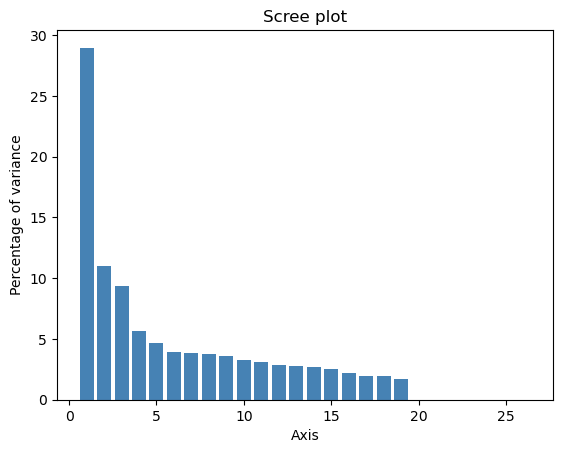

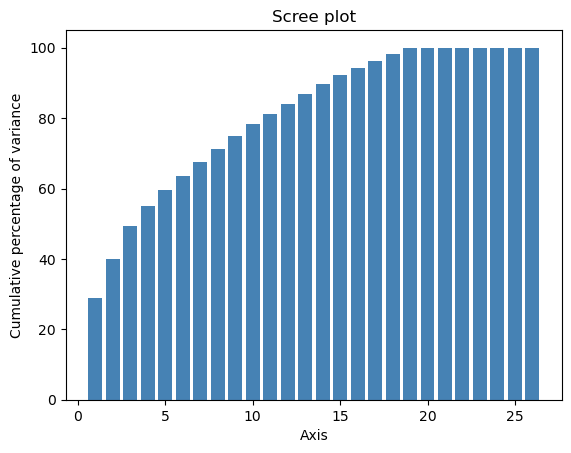

In [382]:
from fanalysis.mca import MCA
data_cat=data.select_dtypes(include=["object"]).drop(columns=["customerID","Churn"])
x=MCA()
x.fit(data_cat.values)
x.eig_
x.plot_eigenvalues(type="percentage")
x.plot_eigenvalues(type="cumulative")


en se basant sur le screeplot des valeurs propres cumullé on constate que 80% de la variance ,a priorie,est expliqué par 11 axes . Mais je dis a priori car on ne peut pas se baser sur cet graphique car elle est biaisé . Elle est biaisé du faite que le nombre de modalité est superieur au nombre de variable ce qui introduit les redondances du au indicatrice des differentes variables (la somme des indicatrice des individus est egale a 1). 
Et donc nous allons proceder a deux correction ,celle de benzecris et celle de greenacre. (benzecri garde seulement les axes pertininent superieur a l'inertie moyenne et greenacre ajuste l’inertie totale à 100 % en répartissant l’inertie corrigée ).

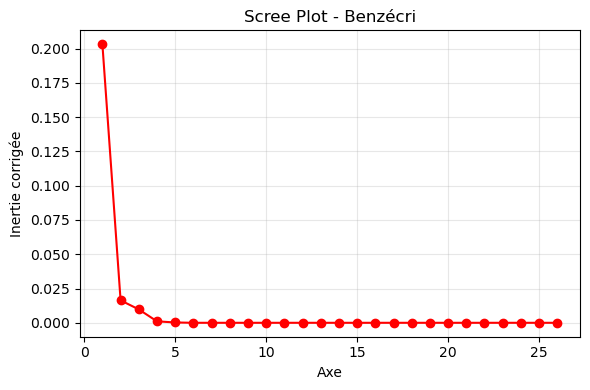

In [383]:
import numpy as np
import matplotlib.pyplot as plt

def correction_benzecri(eig, n_variables):
    eig_corrigees = []
    seuil = 1 / n_variables
    for lambda_i in eig:
        if lambda_i > seuil:  # Comparaison scalaire
            lambda_corr = (n_variables / (n_variables - 1)) * (lambda_i - seuil) ** 2
            eig_corrigees.append(lambda_corr)
        else:
            eig_corrigees.append(0)
    return np.array(eig_corrigees)

# --- CORRECTION ---
eig_benzecri = correction_benzecri(x.eig_[0], data_cat.shape[1])

# Screeplot Benzécri
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(eig_benzecri)+1), eig_benzecri, 'o-', color='red')
plt.title("Scree Plot - Benzécri")
plt.xlabel("Axe")
plt.ylabel("Inertie corrigée")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

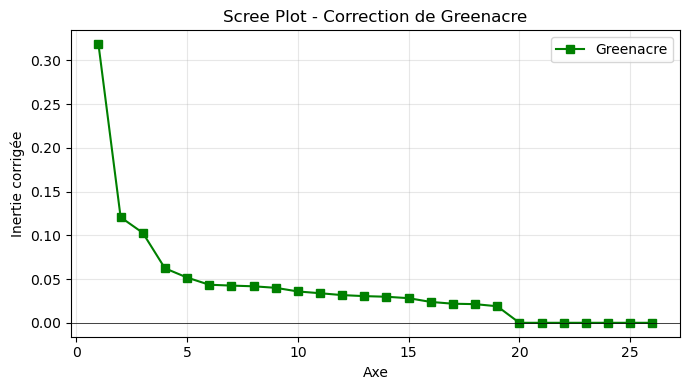

In [384]:
def correction_greenacre(eig, n_variables, n_modalites):
    """
    Applique la correction de Greenacre
    eig : array des valeurs propres brutes
    n_variables : nombre de variables actives
    n_modalites : nombre total de modalités
    """
    eig = np.array(eig).flatten()
    facteur = (n_modalites - n_variables) / n_modalites
    eig_corrigees = []
    
    for lambda_i in eig:
        if lambda_i > 0:
            lambda_corr = lambda_i * facteur
            eig_corrigees.append(lambda_corr)
        else:
            eig_corrigees.append(0)
    
    return np.array(eig_corrigees)

# --- APPLICATION ---
n_variables = data_cat.shape[1]           # Nombre de variables
n_modalites = sum(data_cat.nunique())     # Nombre total de modalités

eig_greenacre = correction_greenacre(x.eig_[0], n_variables, n_modalites)

# --- SCREE PLOT GREENACRE ---
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(eig_greenacre)+1), eig_greenacre, 's-', color='green', label='Greenacre')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.title("Scree Plot - Correction de Greenacre")
plt.xlabel("Axe")
plt.ylabel("Inertie corrigée")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [385]:
inertie_cumulee = np.cumsum(eig_greenacre)
pourcentage_cumule = (inertie_cumulee / inertie_cumulee[-1]) * 100

# --- TABLEAU ---
tableau = pd.DataFrame({
    'Axe': [f'Dim {i+1}' for i in range(len(eig_greenacre))],
    'Inertie corrigée': np.round(eig_greenacre, 4),
    'Inertie cumulée': np.round(inertie_cumulee, 4),
    '% Inertie cumulée': np.round(pourcentage_cumule, 2)
})

print("=== INERTIE CUMULÉE — GREENACRE ===")
print(tableau.head(10))  

=== INERTIE CUMULÉE — GREENACRE ===
      Axe  Inertie corrigée  Inertie cumulée  % Inertie cumulée
0   Dim 1            0.3184           0.3184              28.96
1   Dim 2            0.1207           0.4390              39.94
2   Dim 3            0.1028           0.5419              49.30
3   Dim 4            0.0623           0.6042              54.97
4   Dim 5            0.0517           0.6559              59.67
5   Dim 6            0.0435           0.6994              63.63
6   Dim 7            0.0425           0.7419              67.50
7   Dim 8            0.0417           0.7836              71.29
8   Dim 9            0.0400           0.8236              74.93
9  Dim 10            0.0358           0.8594              78.19


En conclusion nous garderont 8 axes (ces 8 axes explique 70% de la variance ) . 

In [386]:
# 1. Variables numériques à garder
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data_num = data.select_dtypes(include=["number"]).copy()

# 2. 8 axes MCA
coords =x.row_coord_[:, :8]
coords_df = pd.DataFrame(coords, columns=[f'MCA_{i+1}' for i in range(8)])

# 3. Cible
y = data['Churn']

# 4. Dataset réduit : 5 num + 8 MCA = 13 colonnes
data_reduit = pd.concat([data_num, coords_df], axis=1)
data_reduit['Churn'] = y

print(f"Dataset réduit : {data_reduit.shape}")
# → (7043, 13)

Dataset réduit : (7043, 13)


In [387]:
display(data_reduit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   MCA_1           7043 non-null   float64
 5   MCA_2           7043 non-null   float64
 6   MCA_3           7043 non-null   float64
 7   MCA_4           7043 non-null   float64
 8   MCA_5           7043 non-null   float64
 9   MCA_6           7043 non-null   float64
 10  MCA_7           7043 non-null   float64
 11  MCA_8           7043 non-null   float64
 12  Churn           7043 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 715.4+ KB


None

In [388]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [389]:
## Encodage de notre variable cible 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_reduit['Churn'] = le.fit_transform(data_reduit['Churn'])

In [390]:
display(data_reduit.head())
display(data_reduit.info())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MCA_1,MCA_2,MCA_3,MCA_4,MCA_5,MCA_6,MCA_7,MCA_8,Churn
0,0,1,29.85,29.85,-0.574787,0.228946,-0.966507,-0.469840,-0.437808,-0.280183,0.087346,-0.234309,0
1,0,34,56.95,1889.50,-0.193330,0.131002,-0.403885,0.553947,0.501957,0.558217,0.137420,0.109754,0
2,0,2,53.85,108.15,-0.297727,0.364258,-0.327594,0.504913,0.324360,0.070137,-0.110464,0.188838,1
3,0,45,42.30,1840.75,-0.411952,-0.391762,-1.210812,-0.127942,0.369006,0.190828,0.342405,0.392699,0
4,0,2,70.70,151.65,-0.422695,0.814184,0.099132,0.068212,-0.019187,-0.177500,0.067922,-0.202403,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   MCA_1           7043 non-null   float64
 5   MCA_2           7043 non-null   float64
 6   MCA_3           7043 non-null   float64
 7   MCA_4           7043 non-null   float64
 8   MCA_5           7043 non-null   float64
 9   MCA_6           7043 non-null   float64
 10  MCA_7           7043 non-null   float64
 11  MCA_8           7043 non-null   float64
 12  Churn           7043 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 715.4 KB


None

#### Constrction des modeles 

In [391]:
## division du jeu de données en trois ensembles : entraînement, validation et test
from sklearn.model_selection import train_test_split
X = data_reduit.drop(columns=['Churn'])
y = data_reduit['Churn']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("division des données effectuée avec succès")

division des données effectuée avec succès


In [392]:
display(X.columns)
display(y.unique())

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'MCA_1',
       'MCA_2', 'MCA_3', 'MCA_4', 'MCA_5', 'MCA_6', 'MCA_7', 'MCA_8'],
      dtype='object')

array([0, 1])

In [393]:
## Construction des modeles
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import xgboost as xgb
import lightgbm as lgb



In [394]:
## modele Random Forest

rf_model = RandomForestClassifier(
    n_estimators=3000, 
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,                   
    warm_start=False
)

rf_model.fit(X_train, y_train)
print("Entrainement effectué avec succès")
y_pred_rf=rf_model.predict(X_val)
print(classification_report(y_val, y_pred_rf))


Entrainement effectué avec succès
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       778
           1       0.59      0.68      0.63       278

    accuracy                           0.79      1056
   macro avg       0.74      0.76      0.74      1056
weighted avg       0.80      0.79      0.80      1056



In [395]:
# Model lightgbm
import lightgbm as lgb
from sklearn.metrics import classification_report

lgb_model = lgb.LGBMClassifier(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=8,
    num_leaves=50,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42,
    verbose=-1
)

lgb1 =lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[lgb.early_stopping(100), lgb.log_evaluation(0)]
)

# Résultats
y_pred_lgb = lgb_model.predict(X_val)
print("LIGHTGBM")
print(classification_report(y_val, y_pred_lgb))

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[981]	valid_0's binary_logloss: 0.443654
LIGHTGBM
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       778
           1       0.55      0.70      0.62       278

    accuracy                           0.77      1056
   macro avg       0.72      0.75      0.73      1056
weighted avg       0.79      0.77      0.78      1056



In [396]:
## model xgboost

scale = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = xgb.XGBClassifier(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=8,
    min_child_weight=20,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale,  
    random_state=42,
    verbosity=0,
    early_stopping_rounds=200
)

xgb1 =xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)
y_pred_xgb = xgb_model.predict(X_val)
print("LIGHTGBM")
print(classification_report(y_val, y_pred_xgb))

LIGHTGBM
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       778
           1       0.54      0.75      0.63       278

    accuracy                           0.77      1056
   macro avg       0.72      0.76      0.73      1056
weighted avg       0.80      0.77      0.78      1056



In [397]:
gbc_model = GradientBoostingClassifier(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    max_features='sqrt',
    random_state=42,
    verbose=0
)

gbc= gbc_model.fit(X_train, y_train)

y_pred_gbc = gbc_model.predict(X_val)
print("GradientBoosting")
print(classification_report(y_val, y_pred_gbc))

GradientBoosting
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       778
           1       0.63      0.51      0.56       278

    accuracy                           0.79      1056
   macro avg       0.73      0.70      0.71      1056
weighted avg       0.78      0.79      0.79      1056



In [398]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=3000,
    learning_rate=0.01,
    depth=8,
    l2_leaf_reg=10,
    subsample=0.8,
    auto_class_weights='Balanced',  
    random_seed=42,
    verbose=0,
    early_stopping_rounds=100
)

cat= cat_model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    verbose=False
)
y_pred_cat = cat_model.predict(X_val)
print("Catboost")
print(classification_report(y_val, y_pred_cat))

Catboost
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       778
           1       0.54      0.80      0.65       278

    accuracy                           0.77      1056
   macro avg       0.73      0.78      0.74      1056
weighted avg       0.82      0.77      0.78      1056



In [399]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(
    n_estimators=3000,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

et= et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_val)
print("extratreee")
print(classification_report(y_val, y_pred_et))

extratreee
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       778
           1       0.55      0.79      0.65       278

    accuracy                           0.77      1056
   macro avg       0.73      0.78      0.74      1056
weighted avg       0.82      0.77      0.78      1056



In [400]:
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
model_dict={"model_lightgbm":lgb1,"model_xgboost":xgb1,"model_catboost":cat,"model_et":et}
def extract_feature_importance(models_dict, X_train, y_train, X_test, y_test, top_n=20):
    """
    Extrait les variables les plus importantes pour chaque modèle.
    
    Parameters:
    -----------
    models_dict : dict
        Dictionnaire {nom_modele: modele_entrainé}
    X_train : DataFrame
        Features d'entraînement
    y_train : Series
        Cible d'entraînement
    X_test : DataFrame
        Features de test
    y_test : Series
        Cible de test
    top_n : int
        Nombre de top features à retourner
    
    Returns:
    --------
    dict : {nom_modele: DataFrame(feature, importance)}
    """
    
    results = {}
    feature_names = X_train.columns.tolist()
    
    for model_name, model in models_dict.items():
        print(f"Extraction pour {model_name}...")
        
        # Méthode 1 : feature_importances_ (Gini/Gain) si disponible
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            method = "Gini/Gain"
        
        # Méthode 2 : coef_ pour modèles linéaires
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_[0])
            method = "Coefficients"
        
        # Méthode 3 : Permutation Importance (plus lent mais universel)
        else:
            perm = permutation_importance(
                model, X_test, y_test, 
                n_repeats=10, 
                random_state=42, 
                n_jobs=-1
            )
            importances = perm.importances_mean
            method = "Permutation"
        
        # Créer DataFrame
        df_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances,
            'Method': method
        })
        
        # Trier et garder top_n
        df_importance = df_importance.sort_values('Importance', ascending=False).head(top_n)
        df_importance['Rank'] = range(1, len(df_importance) + 1)
        df_importance['Model'] = model_name
        
        # Normaliser à 100%
        df_importance['Importance_Pct'] = (
            df_importance['Importance'] / df_importance['Importance'].sum() * 100
        ).round(2)
        
        results[model_name] = df_importance.reset_index(drop=True)
        
    return results
display(extract_feature_importance(model_dict, X_train, y_train, X_test, y_test, top_n=20))

Extraction pour model_lightgbm...
Extraction pour model_xgboost...
Extraction pour model_catboost...
Extraction pour model_et...


{'model_lightgbm':            Feature  Importance     Method  Rank           Model  \
 0           tenure        4387  Gini/Gain     1  model_lightgbm   
 1   MonthlyCharges        4061  Gini/Gain     2  model_lightgbm   
 2     TotalCharges        3933  Gini/Gain     3  model_lightgbm   
 3            MCA_5        3669  Gini/Gain     4  model_lightgbm   
 4            MCA_1        3668  Gini/Gain     5  model_lightgbm   
 5            MCA_3        3540  Gini/Gain     6  model_lightgbm   
 6            MCA_6        3530  Gini/Gain     7  model_lightgbm   
 7            MCA_2        3463  Gini/Gain     8  model_lightgbm   
 8            MCA_7        3159  Gini/Gain     9  model_lightgbm   
 9            MCA_8        3002  Gini/Gain    10  model_lightgbm   
 10           MCA_4        2846  Gini/Gain    11  model_lightgbm   
 11   SeniorCitizen         178  Gini/Gain    12  model_lightgbm   
 
     Importance_Pct  
 0            11.12  
 1            10.30  
 2             9.97  
 3      

## optimisation du modele extratree 

### suppression des variables "moins" importante 

In [401]:
## suppression de certaines varibales 
## modele extratree
data_reduit1=data_reduit.copy()
display(data_reduit1.info())
data_reduit1=data_reduit1.drop(["MCA_3", "MCA_4","MCA_5","MCA_6","MCA_7","MCA_8","SeniorCitizen"],axis=1)
data_reduit1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   MCA_1           7043 non-null   float64
 5   MCA_2           7043 non-null   float64
 6   MCA_3           7043 non-null   float64
 7   MCA_4           7043 non-null   float64
 8   MCA_5           7043 non-null   float64
 9   MCA_6           7043 non-null   float64
 10  MCA_7           7043 non-null   float64
 11  MCA_8           7043 non-null   float64
 12  Churn           7043 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 715.4 KB


None

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'MCA_1', 'MCA_2', 'Churn'], dtype='object')

#### division du jeu de données 

In [402]:
## division du jeu de données en trois ensembles : entraînement, validation et test
from sklearn.model_selection import train_test_split
X = data_reduit1.drop(columns=['Churn'])
y = data_reduit1['Churn']
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp1, y_temp1, test_size=0.5, random_state=42)
print("division des données effectuée avec succès")

division des données effectuée avec succès


In [403]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(
    n_estimators=3000,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

et= et_model.fit(X_train1, y_train1)
y_pred_et = et_model.predict(X_val1)
print("extratreee")
print(classification_report(y_val1, y_pred_et))

extratreee
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       778
           1       0.54      0.79      0.64       278

    accuracy                           0.77      1056
   macro avg       0.73      0.78      0.74      1056
weighted avg       0.81      0.77      0.78      1056



Nous constatons que supprimer certaine variables qu'on avait juger "moins importante" n'a pas augmenter notre score mais a fait plutôt le contraire . du coup nous opteront pour l'abandons de cette methode . 

#### Choix des modeles retenue pour la suite 


Apres comparaison des differents modeles developpés nous avons retenue le modele "Catboost" ,le modele "randomforest"et le modele "extraboost" . 
cet sont nos modeles qui des a present subiront les modifications dû a l'optimisation . 

### Feature Engineering 

In [404]:
# On travaille sur la bonne copie
data_reduit2 = data_reduit.copy()

# 1. Contract_Tenure → version 100% safe (plus d'erreur de dtype)
data_reduit2['Contract_Tenure'] = (
    data['Contract'].astype(str) + "_ten" + 
    pd.cut(data['tenure'], 
           bins=[-1, 6, 12, 24, 48, 1000],          # -1 pour inclure tenure=0
           labels=['0-6', '7-12', '13-24', '25-48', '48+']
          ).astype(str)
)

# Si jamais il y a des NaN dans le cut (rare mais possible), on remplace par 'unknown'
data_reduit2['Contract_Tenure'] = data_reduit2['Contract_Tenure'].replace('nan', 'unknown')

In [405]:
# Client à très haut risque (souvent >50% de churn)
data_reduit2['HighRiskProfile'] = (
    (data['Contract']=='Month-to-month') &
    (data['tenure'] <= 12) &
    (data['InternetService']=='Fiber optic') &
    (data['PaperlessBilling']=='Yes')
).astype(int)

# Client quasi fidèle
data_reduit2['LoyalProfile'] = (
    (data['Contract']=='Two year') |
    (data['tenure'] > 60)
).astype(int)

In [406]:
print(data_reduit2.head())
print(data_reduit2.info())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges     MCA_1     MCA_2  \
0              0       1           29.85         29.85 -0.574787  0.228946   
1              0      34           56.95       1889.50 -0.193330  0.131002   
2              0       2           53.85        108.15 -0.297727  0.364258   
3              0      45           42.30       1840.75 -0.411952 -0.391762   
4              0       2           70.70        151.65 -0.422695  0.814184   

      MCA_3     MCA_4     MCA_5     MCA_6     MCA_7     MCA_8  Churn  \
0 -0.966507 -0.469840 -0.437808 -0.280183  0.087346 -0.234309      0   
1 -0.403885  0.553947  0.501957  0.558217  0.137420  0.109754      0   
2 -0.327594  0.504913  0.324360  0.070137 -0.110464  0.188838      1   
3 -1.210812 -0.127942  0.369006  0.190828  0.342405  0.392699      0   
4  0.099132  0.068212 -0.019187 -0.177500  0.067922 -0.202403      1   

         Contract_Tenure  HighRiskProfile  LoyalProfile  
0  Month-to-month_ten0-6                

In [407]:
data_reduit2["Contract_Tenure"].unique()

array(['Month-to-month_ten0-6', 'One year_ten25-48',
       'Month-to-month_ten7-12', 'Month-to-month_ten13-24',
       'Month-to-month_ten25-48', 'One year_ten48+', 'Two year_ten13-24',
       'Month-to-month_ten48+', 'Two year_ten48+', 'One year_ten7-12',
       'One year_ten13-24', 'Two year_ten25-48', 'One year_ten0-6',
       'Two year_ten7-12', 'Two year_ten0-6'], dtype=object)

In [408]:
from sklearn.preprocessing import OneHotEncoder

# On crée l'encodeur
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' pour éviter une colonne redondante

# On applique sur Contract_Tenure (il faut [[ ]] → 2D array)
encoded = encoder.fit_transform(data_reduit2[['Contract_Tenure']])

# On récupère les noms des nouvelles colonnes
col_names = encoder.get_feature_names_out(['Contract_Tenure'])

# On crée un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded, columns=col_names, index=data_reduit2.index)

# On supprime l’ancienne colonne et on ajoute les nouvelles
data_reduit2 = pd.concat([data_reduit2.drop('Contract_Tenure', axis=1), encoded_df], axis=1)

print(data_reduit2.filter(like='Contract_Tenure').columns)

Index(['Contract_Tenure_Month-to-month_ten13-24',
       'Contract_Tenure_Month-to-month_ten25-48',
       'Contract_Tenure_Month-to-month_ten48+',
       'Contract_Tenure_Month-to-month_ten7-12',
       'Contract_Tenure_One year_ten0-6', 'Contract_Tenure_One year_ten13-24',
       'Contract_Tenure_One year_ten25-48', 'Contract_Tenure_One year_ten48+',
       'Contract_Tenure_One year_ten7-12', 'Contract_Tenure_Two year_ten0-6',
       'Contract_Tenure_Two year_ten13-24',
       'Contract_Tenure_Two year_ten25-48', 'Contract_Tenure_Two year_ten48+',
       'Contract_Tenure_Two year_ten7-12'],
      dtype='object')


In [409]:
print(data_reduit2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   MCA_1                                    7043 non-null   float64
 5   MCA_2                                    7043 non-null   float64
 6   MCA_3                                    7043 non-null   float64
 7   MCA_4                                    7043 non-null   float64
 8   MCA_5                                    7043 non-null   float64
 9   MCA_6                                    7043 non-null   float64
 10  MCA_7                                    7043 no

In [410]:
## division du jeu de données en trois ensembles : entraînement, validation et test
from sklearn.model_selection import train_test_split
X = data_reduit2.drop(columns=['Churn'])
y = data_reduit2['Churn']
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.3, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)
print("division des données effectuée avec succès")

division des données effectuée avec succès


In [411]:
from catboost import CatBoostClassifier

cat_model2 = CatBoostClassifier(
    iterations=3000,
    learning_rate=0.01,
    depth=8,
    l2_leaf_reg=10,
    subsample=0.8,
    auto_class_weights='Balanced',  
    random_seed=42,
    verbose=0,
    early_stopping_rounds=100
)

cat2= cat_model2.fit(
    X_train2, y_train2,
    eval_set=(X_val2, y_val2),
    verbose=False
)
y_pred_cat = cat_model2.predict(X_val2)
print("Catboost")
print(classification_report(y_val2, y_pred_cat))

Catboost
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       778
           1       0.53      0.79      0.64       278

    accuracy                           0.76      1056
   macro avg       0.72      0.77      0.73      1056
weighted avg       0.81      0.76      0.78      1056



In [412]:
from sklearn.ensemble import ExtraTreesClassifier

et_model2 = ExtraTreesClassifier(
    n_estimators=3000,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

et2= et_model2.fit(X_train2, y_train2)
y_pred_et = et_model2.predict(X_val2)
print("extratreee")
print(classification_report(y_val2, y_pred_et))

extratreee
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       778
           1       0.52      0.84      0.64       278

    accuracy                           0.76      1056
   macro avg       0.72      0.78      0.73      1056
weighted avg       0.82      0.76      0.77      1056



In [413]:
## modele Random Forest

rf_model = RandomForestClassifier(
    n_estimators=3000, 
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,                   
    warm_start=False
)

rf_model.fit(X_train2, y_train2)
print("Entrainement effectué avec succès")
y_pred_rf=rf_model.predict(X_val2)
print(classification_report(y_val2, y_pred_rf))

Entrainement effectué avec succès
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       778
           1       0.58      0.69      0.63       278

    accuracy                           0.79      1056
   macro avg       0.73      0.76      0.74      1056
weighted avg       0.80      0.79      0.79      1056



### Conclusion 

En definitive le modele retenue sera le modele Randomforest avec un accuracy de 79% . 